# ML Activity
Darren S. Malibiran
CS - 4202

## Libraries

In [1]:
!pip install pandas numpy
!pip install scikit-learn
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

## Dataset
- Abalone from UCI


### Get the dataset
- You can download the file and upload it here or on GDrive (+ connect)
  - or simply download it in this Colab Session

In [3]:
!curl -o "harware.zip" https://archive.ics.uci.edu/static/public/29/computer+hardware.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4482    0  4482    0     0   4754      0 --:--:-- --:--:-- --:--:--  4752


In [4]:
!rm -rf machine*
!rm -rf Index
!unzip harware.zip

Archive:  harware.zip
  inflating: Index                   
  inflating: machine.data            
  inflating: machine.names           


In [ ]:
# machine.data contains comma separated values. You can directly read it with pandas using read_csv. If you want, you can rename it as a CSV file
#!mv machine.data machine.csv

In [5]:
data = pd.read_csv("machine.data", names = ['vendor', 'model_name', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp', 'erp'])

### Explore the data

In [6]:
data.head()

,vendor,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [7]:
data.shape

(209, 10)

In [8]:
data.dtypes

vendor        object
model_name    object
myct           int64
mmin           int64
mmax           int64
cach           int64
chmin          int64
chmax          int64
prp            int64
erp            int64
dtype: object

## Data Preprocessing

### Remove Duplicates, if they exist

In [9]:
data[data.duplicated(keep = False)]

,vendor,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp


After checking, it seems that there are no rows that are duplicated

### Drop NA values, if they exist

In [10]:
for index, i in enumerate(data.isnull().any(axis=1)):
  if i:
    print(f"Row {index} contains a Null value")

It seems that the data is clean. The rows from the dataset does not contain any missing value

## Select the indepentent variable(s) X and the dependent variable Y
- Out of the dataset columns, I've made an assumption that the myct (machine cycle time), mmax (maximum main memory), cach (cache memory), and chmax (max channnel in unit) are the independent variables with prp as the dependent variable
  - The X reasonably affect Y
  - The X attributes are independent of each other
- We'll investigate on the correlation of this later. But for now, we'll select these columns

In [11]:
selected_data = data[['myct', 'mmax', 'cach', 'chmax', 'prp']]

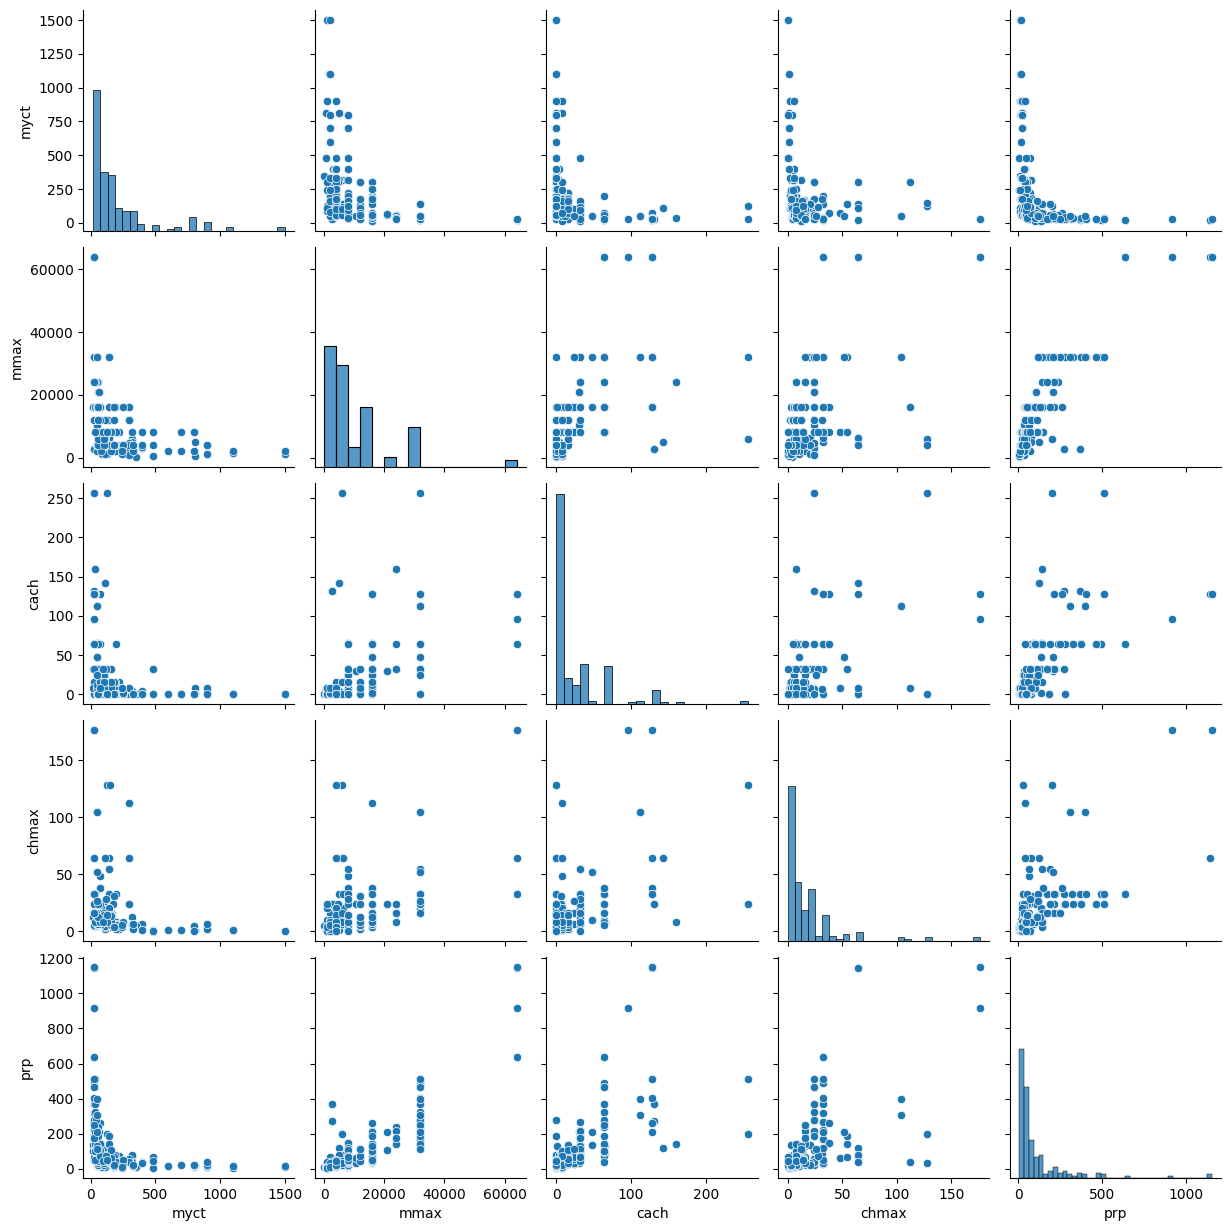

In [14]:
sns.pairplot(selected_data)

## Examine Columns Correlation
- the area column will be the dependent variable while the other three (wind, RH [Relative Humidity], and rain) will be the X

In [12]:
np.corrcoef(selected_data['myct'], selected_data['prp'])

array([[ 1.        , -0.30709945],
       [-0.30709945,  1.        ]])

In [ ]:
np.corrcoef(selected_data['mmax'], selected_data['prp'])

array([[1.        , 0.86300412],
       [0.86300412, 1.        ]])

In [ ]:
np.corrcoef(selected_data['cach'], selected_data['prp'])

array([[1.        , 0.66264143],
       [0.66264143, 1.        ]])

In [ ]:
np.corrcoef(selected_data['chmax'], selected_data['prp'])

array([[1.        , 0.60520929],
       [0.60520929, 1.        ]])

- Out of the independent features I've initially selected, only MYCT seems to have a weak correlation to our dependent variable PRP (published relative performance). So, we'll finalize now our x and y variables
- Most of our datapoints are concentrated to the left but there's still enough higher values to make assumptions

In [15]:
final_data = data[['mmax', 'cach', 'chmax', 'prp']]

## Train and Test subsets
- 80% train, 20% test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(final_data, test_size=0.2, random_state = 69)

## Create Multilinear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
# Fit the model
model.fit(train[['mmax', 'cach', 'chmax']], train['prp'])

LinearRegression()

## Create Prediction and Evaluate the model

In [21]:
x_test = test[['mmax', 'cach', 'chmax']]
y_test = test['prp']

In [22]:
y_prediction = model.predict(x_test)

In [23]:
# Concat the truth and prediction to a single dataset for visualization
temp_data = pd.concat([x_test, pd.DataFrame({'prp_truth': y_test}).reset_index(drop = True), pd.DataFrame({'prp_prediction': y_prediction})], axis = 1)


In [28]:
temp_data = pd.concat([x_test.reset_index(drop=True),pd.DataFrame({'prp_truth': y_test}).reset_index(drop = True), pd.DataFrame({'prp_prediction': y_prediction})], axis = 1)


In [31]:
temp_data.head()

,mmax,cach,chmax,prp_truth,prp_prediction
0,8000,24,6,26,56.416309
1,8000,24,6,32,56.416309
2,8000,16,14,58,57.462596
3,1000,0,20,36,-18.602659
4,16000,32,16,214,150.526268


<Axes: xlabel='chmax', ylabel='prp_truth'>

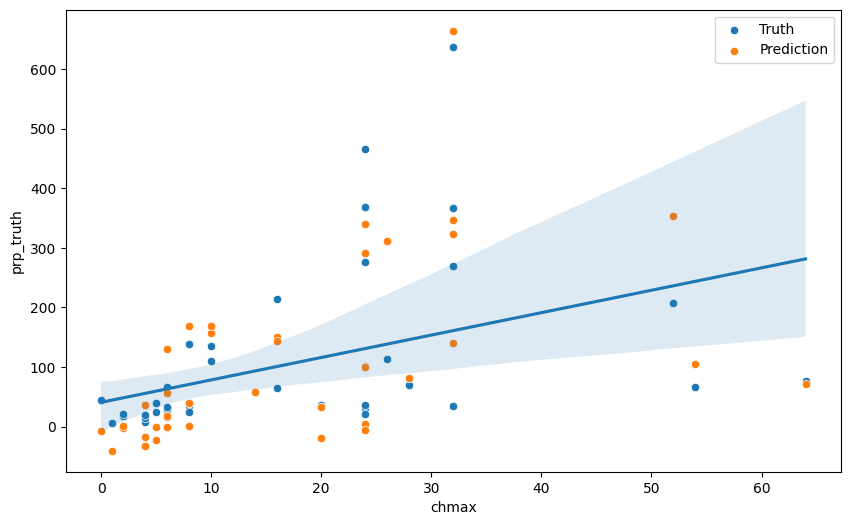

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=temp_data['chmax'], y=temp_data['prp_truth'], data=temp_data, label='Truth')
sns.scatterplot(x=temp_data['chmax'], y=temp_data['prp_prediction'], data=temp_data, label='Prediction')
sns.regplot(x=temp_data['chmax'], y=temp_data['prp_truth'], data=temp_data, scatter=False)
plt.xlabel('chmax')
plt.ylabel('PRP')
plt.title('Scatterplot of chmax vs PRP with Regression Lines')

> Todo: Visualizing prediction and regression line

Evaluate using the R2 Score, MSE, RMSE

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

_r2_score = r2_score(y_test, y_prediction)
_mse = mean_squared_error(y_test, y_prediction)
_rmse = mean_squared_error(y_test, y_prediction, squared = False)

In [26]:
print(f"R2 Score: {_r2_score}  |  MSE: {_mse}. |. RMSE: {_rmse}")

R2 Score: 0.7318405568629398  |  MSE: 5031.515764286436. |. RMSE: 70.9331781628769


## Saving the Model